# Assignment 1: Evolutionary Process Discovery
---

### 1. 🟢

(5 points) Implement the GA using deap.algorithms.eaSimple method in DEAP. Please
use [‘cxTwoPoint’, ‘mutFlipBit’, ‘selTournament’] as the [Crossover, Mutation, Selection]
operators, record the default parameter of your initial GA and plot the best fitness at
each iteration 

In [1]:
# Import Libraries
from deap import base, creator, tools, algorithms
import numpy as np
import pandas as pd
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the current working directory is in the python path
import sys
sys.path.append('./Assignment_1')

# Ensure Graphviz is in the path
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from support import *

In [2]:
# Set global variables
POP_SIZE = 300
NUM_RUNS = 30

gen	nevals	avg    	std    	min  	max  
0  	300   	142.991	78.5165	-10.1	400.6
1  	179   	198.675	68.5918	9.6  	400.6
2  	176   	249.696	62.0388	7.3  	417.4
3  	189   	282.899	63.1797	80.5 	417.6
4  	188   	312.131	62.393 	80.6 	419.3
5  	185   	333.163	63.5846	80.9 	419.3
6  	191   	352.684	60.2162	80.3 	436.3
7  	186   	363.369	68.865 	80.8 	439.8
8  	174   	381.845	58.3946	80.8 	440.7
9  	173   	383.476	65.5185	80.9 	456.4
10 	163   	398.542	52.0576	136.5	455.8
11 	180   	400.185	57.6492	81.3 	458.2
12 	182   	392.201	76.1899	81   	495.7
13 	167   	406.997	61.771 	81.4 	496  
14 	189   	416.292	54.9498	81.7 	496.1
15 	194   	421.46 	58.8267	100.9	533.6
16 	179   	425.555	61.8109	80.4 	534  
17 	177   	435.35 	68.0892	81.7 	534.7
18 	193   	443.759	71.8626	82.2 	534.8
19 	174   	459.406	82.5149	72.6 	534.8
20 	178   	474.492	90.4341	81.9 	535.4
21 	188   	485.591	96.2223	81.2 	535.4
22 	176   	489.192	102.108	81.2 	535.5
23 	176   	499.714	88.0783	81.9 	535.5
24 	168   	492.272	102.38

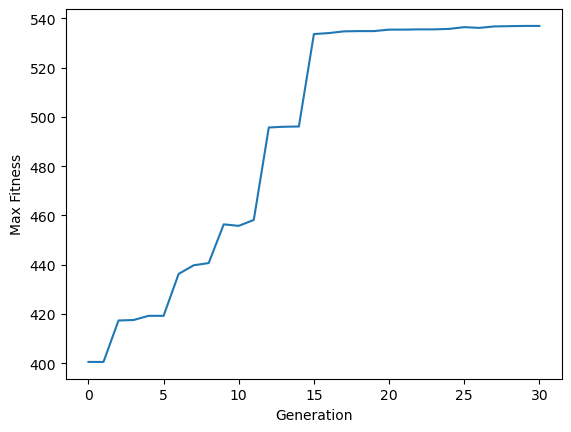

In [3]:
# Create the types globally
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create the toolbox
toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_int", np.random.randint, -1, 2)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=PLACES*TRANSITIONS)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
pop = toolbox.population(n=POP_SIZE)

# Record the evolution
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Run the GA
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=True)

# Plot the best fitness at each iteration
gen, max_ = log.select("gen", "max")
plt.plot(gen, max_)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.show()

Then you have to investigate the performance of the GA: in task 2 and 3 that you will do,
check the distribution of the fitness values of the best solution found across 30 runs by
creating boxplots. Also, check the average best fitness(ABF) at each iteration (over 30 runs)
to verify possible premature convergence by creating line plots. The Figure 3 is an example of
multiple line plots and boxplots for reference (please notice that we have a maximization
problem here and the line plot might look different).

In [4]:
# Create classes to run the genetic algorithm and store the results
class GeneticAlgorithm:
    """
    A class to run a genetic algorithm with the specified parameters
    
    Attributes:
    cx (str): the crossover operator to use
    mut (str): the mutation operator to use
    sel (str): the selection operator to use
    cxpb (float): the crossover probability
    mutpb (float): the mutation probability
    ngen (int): the number of generations
    tournsize (int): the tournament size (if the selection operator is selTournament)
    indpb (float): the probability of mutating each attribute
    pop_size (int): the population size
    results (list): a list to store the results of each run
    toolbox (deap.base.Toolbox): the toolbox to use for the GA
    
    Methods:
    register_operators: Register the crossover, mutation, and selection operators with the toolbox
    run_ga: Run the GA with the specified parameters and return the average best fitness and the running time
    plot_fitness_iterations: Plot the best fitness at each iteration for each set of parameters
    plot_abf_boxplot: Plot a boxplot of the average best fitness for each set of parameters
    """
    def __init__(
        self, cx, mut, sel, cxpb=0.5, mutpb=0.2, ngen=30, tournsize=3, indpb=0.05, pop_size=300
    ):
        # Store the parameters
        self.cx = cx
        self.mut = mut
        self.sel = sel
        self.cxpb = cxpb
        self.mutpb = mutpb
        self.ngen = ngen
        self.tournsize = tournsize
        self.indpb = indpb
        self.pop_size = pop_size
        self.results = []

        # Create the toolbox
        self.toolbox = base.Toolbox()

        # Attribute generator
        self.toolbox.register("attr_int", np.random.randint, -1, 2)

        # Structure initializers
        self.toolbox.register(
            "individual",
            tools.initRepeat,
            creator.Individual,
            self.toolbox.attr_int,
            n=PLACES * TRANSITIONS,
        )

        # Create the population
        self.toolbox.register(
            "population", tools.initRepeat, list, self.toolbox.individual
        )
        
        # Register the evaluation function
        self.toolbox.register("evaluate", fitness)

        # Register the operators
        self.register_operators()

    def register_operators(self):
        """
        Register the crossover, mutation, and selection operators with the toolbox
        
        Parameters:
        cx (str): the crossover operator to use
        mut (str): the mutation operator to use
        sel (str): the selection operator to use
        
        Raises:
        ValueError: if the operator name is invalid
        """
        # Check if the operators exist before registering them
        for operator in [self.cx, self.mut, self.sel]:
            if not hasattr(tools, operator):
                raise ValueError(f"Invalid operator name: {operator}")

        self.toolbox.register("mate", getattr(tools, self.cx))
        self.toolbox.register("mutate", getattr(tools, self.mut), indpb=self.indpb)
        if self.sel == "selTournament":
            self.toolbox.register(
                "select", getattr(tools, self.sel), tournsize=self.tournsize
            )
        else:
            self.toolbox.register("select", getattr(tools, self.sel))

    # Create a function to run the GA with the specified parameters
    def run_ga(self, 
        num_runs = 30, verbose = False
    ):
        """
        Run the GA with the specified parameters and return the average best fitness and the running time

        Parameters:
        num_runs (int): the number of runs to execute
        cx (str): the crossover operator to use
        mut (str): the mutation operator to use
        sel (str): the selection operator to use
        cxpb (float): the crossover probability
        mutpb (float): the mutation probability
        ngen (int): the number of generations
        tournsize (int): the tournament size (if the selection operator is selTournament)
        indpb (float): the probability of mutating each attribute
        """
        # Initialize lists to store the best fitness found in each run and at each iteration
        best_fitness_runs = []
        best_fitness_iterations = []

        # Start the timer
        start_time = time.perf_counter()

        # Run the GA num_runs times
        for _ in range(num_runs):

            # Initialize the Hall of Fame and the statistics
            hof = tools.HallOfFame(1)
            stats = tools.Statistics(lambda ind: ind.fitness.values)
            stats.register("avg", np.mean)
            stats.register("std", np.std)
            stats.register("min", np.min)
            stats.register("max", np.max)

            # Create the population
            pop = self.toolbox.population(n=self.pop_size)

            # Run the GA
            pop, log = algorithms.eaSimple(
                pop,
                self.toolbox,
                cxpb=self.cxpb,
                mutpb=self.mutpb,
                ngen=self.ngen,
                stats=stats,
                halloffame=hof,
                verbose=verbose,
            )

            # Record the best fitness found in this run
            best_fitness_runs.append(hof[0].fitness.values[0])

            # Record the best fitness at each iteration
            best_fitness_iterations.append(log.select("max"))

        # Calculate the ABF and the running time
        abf = np.mean(best_fitness_runs)
        running_time = time.perf_counter() - start_time

        return GAResults(
            self.cx,
            self.mut,
            self.sel,
            self.cxpb,
            self.mutpb,
            abf,
            running_time,
            best_fitness_iterations,
            best_fitness_runs,
        )

class GAResults:
    """
    A class to store the results of a genetic algorithm run
    
    Attributes:
    cx (str): the crossover operator used
    mut (str): the mutation operator used
    sel (str): the selection operator used
    abf (float): the average best fitness found
    running_time (float): the running time of the GA
    best_fitness_iterations (list): the best fitness at each iteration
    best_fitness_runs (list): the best fitness found in each run
    """
    def __init__(
        self,
        cx,
        mut,
        sel,
        cxpb,
        mutpb,
        abf,
        running_time,
        best_fitness_iterations,
        best_fitness_runs,
    ):
        self.cx = cx
        self.mut = mut
        self.sel = sel
        self.cxpb = cxpb
        self.mutpb = mutpb
        self.abf = abf
        self.running_time = running_time
        self.best_fitness_iterations = best_fitness_iterations
        self.best_fitness_runs = best_fitness_runs

In [5]:
def plot_best_fitness(results):
    """
    This function plots the best fitness at each iteration for each set of parameters.

    Parameters:
    results (list): A list of results. Each result should be an object with a
                    'best_fitness_iterations' attribute, which is a 2D array where
                    each row is a run and each column is an iteration.

    Returns:
    None
    """
    # Initialize a figure
    plt.figure()

    # Plot the best fitness at each iteration for each set of parameters
    for i, result in enumerate(results):
        best_fitness = np.mean(result.best_fitness_iterations, axis=0)
        plt.plot(best_fitness, label=f"Combination {i + 1}")

    # Place the legend outside of the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Best fitness at each iteration for each parameter combination")
    plt.tight_layout()
    plt.show()


def plot_boxplot(results):
    """
    This function plots a boxplot of the best fitness for each set of parameters.

    Parameters:
    results (list): A list of results. Each result should be an object with a
                    'best_fitness_runs' attribute, which is a list of the best
                    fitness values for each run.

    Returns:
    None
    """
    # Prepare data for boxplot
    data = []
    for i, result in enumerate(results):
        for fitness in result.best_fitness_runs:
            data.append({"Combination": i + 1, "Best Fitness": fitness})

    # Create a DataFrame
    df = pd.DataFrame(data)

    # Create a box plot
    plt.figure()
    sns.boxplot(x="Combination", y="Best Fitness", data=df)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.title("Box plot of ABF distribution per parameter combination between runs")
    plt.show()


def create_results_table(results, result_type):
    """
    This function creates a nicely formatted table from a list of results.

    Parameters:
    results (list): A list of results. Each result should be an object with 'cx', 'mut', 'sel',
                    'abf', and 'running_time' attributes for 'methods' type and 'cxpb', 'mutpb',
                    'abf', and 'running_time' attributes for 'probabilities' type.
    result_type (str): The type of results being passed. Should be either 'methods' or 'probabilities'.

    Returns:
    pandas.DataFrame: A DataFrame that holds the results.
    """
    if result_type == "methods":
        # Convert the list of results objects to a pandas DataFrame
        df = pd.DataFrame(
            [
                {
                    "Combination": i + 1,
                    "Crossover": result.cx,
                    "Mutation": result.mut,
                    "Selection": result.sel,
                    "ABF": result.abf,
                    "Time (Seconds)": result.running_time,
                }
                for i, result in enumerate(results)
            ]
        )
    elif result_type == "probabilities":
        df = pd.DataFrame(
            [
                {
                    "Combination": i + 1,
                    "Crossover Probability": result.cxpb,
                    "Mutation Probability": result.mutpb,
                    "ABF": result.abf,
                    "Time (Seconds)": result.running_time,
                }
                for i, result in enumerate(results)
            ]
        )
    else:
        raise ValueError("Invalid result_type. Expected 'methods' or 'probabilities'.")

    return df

### 2. 🟢

(5 points) compare the performance of possible variants of your GA, e.g., using
different crossover, mutation, and selection operators. Test the variants in the table
below, and investigate both the impact to the optimization performances and the
overall running time, keep the best choice according to ABF for the later questions.
You can refer to the operators described in DEAP documentation: 

In [6]:
# Define the combinations of operators
combinations = [
    ("cxTwoPoint", "mutFlipBit", "selTournament"),
    ("cxTwoPoint", "mutFlipBit", "selRoulette"),
    ("cxTwoPoint", "mutShuffleIndexes", "selTournament"),
    ("cxTwoPoint", "mutShuffleIndexes", "selRoulette"),
    ("cxOrdered", "mutFlipBit", "selTournament"),
    ("cxOrdered", "mutFlipBit", "selRoulette"),
    ("cxOrdered", "mutShuffleIndexes", "selTournament"),
    ("cxOrdered", "mutShuffleIndexes", "selRoulette"),
]

# Run the GA with different operators and store the results
results = [GeneticAlgorithm(cx, mut, sel, pop_size=POP_SIZE).run_ga(NUM_RUNS) for cx, mut, sel in combinations]

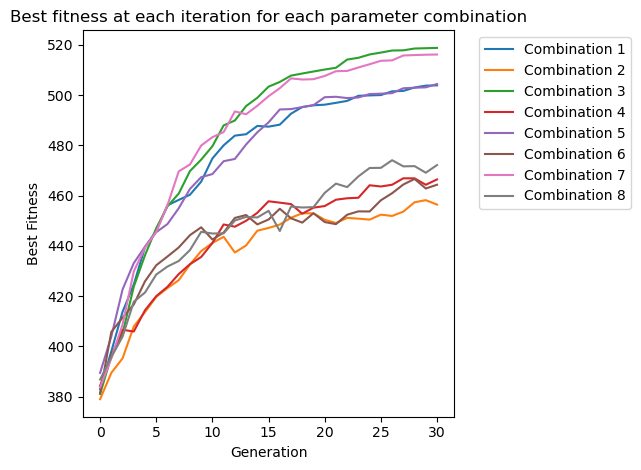

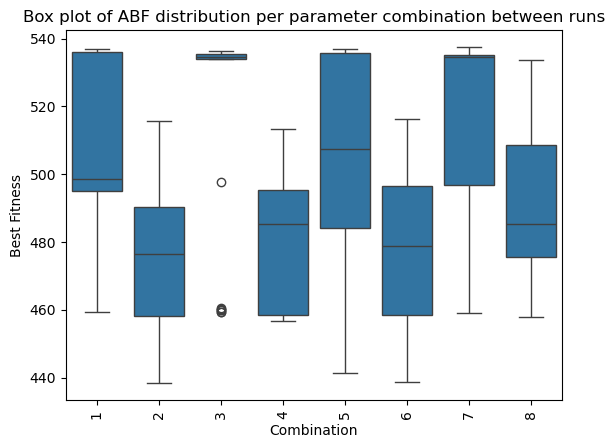

 Combination  Crossover          Mutation     Selection        ABF  Time (Seconds)
           1 cxTwoPoint        mutFlipBit selTournament 505.063333      181.197786
           2 cxTwoPoint        mutFlipBit   selRoulette 475.430000      156.532000
           3 cxTwoPoint mutShuffleIndexes selTournament 518.853333      199.075311
           4 cxTwoPoint mutShuffleIndexes   selRoulette 482.710000      148.538219
           5  cxOrdered        mutFlipBit selTournament 505.623333      182.012605
           6  cxOrdered        mutFlipBit   selRoulette 482.763333      159.476379
           7  cxOrdered mutShuffleIndexes selTournament 516.203333      184.147318
           8  cxOrdered mutShuffleIndexes   selRoulette 490.460000      156.206282


In [7]:
# Plot the best fitness at each iteration
plot_best_fitness(results)

# Plot a boxplot of the best fitness per run for each set of parameters
plot_boxplot(results)

# Use the function to create the results table
df = create_results_table(results, result_type="methods")

# Display the DataFrame without the index
print(df.to_string(index=False))

In [8]:
# Select the parameter with the highest average best fitness
best_index = df["ABF"].idxmax()
cx, mut, sel = combinations[best_index]

### 3. 🟢

(5 points) investigate the impact of mutation and crossover probabilities and try to
determine the best choice of hyper-parameters for this problem, keep the best choice
for the later questions. You are suggested to test mutation and crossover probabilities
in the table below;
Average Best Fitness crossover probabilities
0.2 0.4 0.6 0.8
mutation
probabilities
0.2
0.4
0.6
0.8

In [9]:
# Define the combinations of probabilities
probabilities = [(cxpb, mutpb) for cxpb in [0.2, 0.4, 0.6, 0.8] for mutpb in [0.2, 0.4, 0.6, 0.8]]

# Run the GA with different parameters and store the results
results = [
    GeneticAlgorithm(cx, mut, sel, cxpb, mutpb, pop_size=POP_SIZE).run_ga(NUM_RUNS) for cxpb, mutpb in probabilities
]

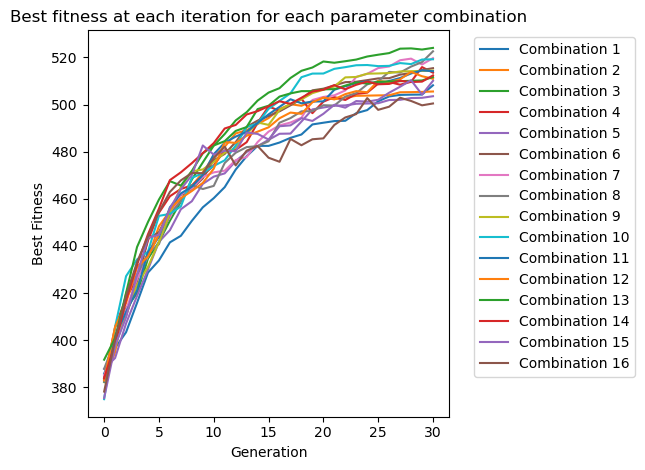

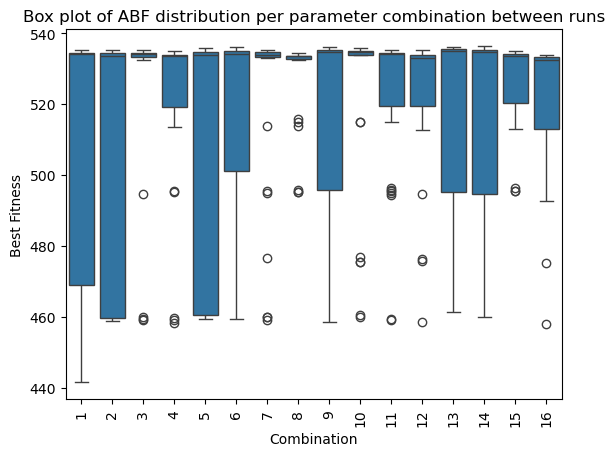

 Combination  Crossover Probability  Mutation Probability        ABF  Time (Seconds)
           1                    0.2                   0.2 509.996667      111.283041
           2                    0.2                   0.4 508.013333      157.314120
           3                    0.2                   0.6 525.273333      202.003974
           4                    0.2                   0.8 521.673333      212.024183
           5                    0.4                   0.2 505.320000      154.741600
           6                    0.4                   0.4 515.446667      180.088946
           7                    0.4                   0.6 521.583333      216.444734
           8                    0.4                   0.8 527.753333      228.138440
           9                    0.6                   0.2 515.520000      197.837124
          10                    0.6                   0.4 522.623333      205.637217
          11                    0.6                   0.6 522.076

In [10]:
# Plot the best fitness at each iteration
plot_best_fitness(results)

# Plot a boxplot of the best fitness per run for each set of parameters
plot_boxplot(results)

# Use the function to create the results table
df = create_results_table(results, result_type="probabilities")

# Display the DataFrame without the index
print(df.to_string(index=False))

In [11]:
# Select the parameters with the highest average best fitness
best_index = df["ABF"].idxmax()
cxpb, mutpb = probabilities[best_index]

# ensure the best performing operators in the toolbox
toolbox.register("mate", getattr(tools, cx))
toolbox.register("mutate", getattr(tools, mut), indpb=0.05)
if sel == "selTournament":
    toolbox.register("select", getattr(tools, sel), tournsize=3)
else:
    toolbox.register("select", getattr(tools, sel))

### 4. 🟢

(3 points) the representation that we are using gives the possibility to connect multiple
places to the same transition, which might be undesirable for PETRINAS. In this task,
you are suggested to exploit tool decoration to handle such type of constraint and “fix”
the candidate solution after a mutation and/or crossover to have at most 2 non-zero
entries for each column;

In [12]:
def max_two_non_zero_per_column():
    """
    Decorator to enforce that each column in the offspring has at most two non-zero elements
    
    Returns:
    function: The decorated function
    """
    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                child_array = list_to_array(
                    child
                )  # Convert to 2D numpy array using the provided function
                for col in range(child_array.shape[1]):
                    while np.count_nonzero(child_array[:, col]) > 2:
                        non_zero_rows = np.nonzero(child_array[:, col])[0]
                        child_array[np.random.choice(non_zero_rows), col] = 0
                child[:] = child_array.flatten().tolist()  # Convert back to list
            return offspring
        return wrapper
    return decorator

In [13]:
# Create the initial population
pop = toolbox.population(n=POP_SIZE)

# Use the eaSimple algorithm to run the genetic algorithm
algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=30)

# Get the best individual
best_before = tools.selBest(pop, 1)[0]

gen	nevals
0  	300   
1  	263   
2  	251   
3  	265   
4  	267   
5  	263   
6  	261   
7  	261   
8  	262   
9  	268   
10 	254   
11 	263   
12 	260   
13 	269   
14 	264   
15 	270   
16 	260   
17 	262   
18 	263   
19 	262   
20 	256   
21 	274   
22 	268   
23 	258   
24 	258   
25 	269   
26 	267   
27 	270   
28 	261   
29 	255   
30 	257   


In [14]:
# Decorate the mate and mutate functions with the constraint
toolbox.decorate("mate", max_two_non_zero_per_column())
toolbox.decorate("mutate", max_two_non_zero_per_column())

In [15]:
# Create the initial population
pop = toolbox.population(n=POP_SIZE)

# Use the eaSimple algorithm to run the genetic algorithm
algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=30)

# Get the best individual
best_after = tools.selBest(pop, 1)[0]
print(best_after)

gen	nevals
0  	300   
1  	254   
2  	265   
3  	272   
4  	257   
5  	263   
6  	265   
7  	268   
8  	270   
9  	267   
10 	267   
11 	264   
12 	272   
13 	264   
14 	256   
15 	257   
16 	265   
17 	278   
18 	269   
19 	257   
20 	260   
21 	271   
22 	273   
23 	267   
24 	261   
25 	257   
26 	263   
27 	262   
28 	262   
29 	261   
30 	270   
[-1, -1, -1, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 5. 🟢

(2 points) use the function matrix_to_graphviz() provided in the file support.py
to plot the best Petri net both before and after using tool decorator (best with respect
to the fitness function) and briefly comment it for PETRINAS. The function receives
as argument a candidate solution, in the form of a linearized matrix. The function
creates a file output.pdf containing the plot. In order to use the
matrix_to_graphviz() you have to install the required libraries: pm4py and
graphviz (see the instructions in the appendix of this file);

In [16]:
matrix_to_graphviz(best_before, output_file="before_constraint.pdf")
matrix_to_graphviz(best_after, output_file="after_constraint.pdf")